In [7]:
from sklearn.datasets import make_blobs, make_classification, make_circles, make_moons
import pandas as pd
import shap
import pickle
import itertools
import math
import statistics
import re
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier#from alibi.explainers import AnchorTabular
from matplotlib import pyplot as plt
import xgboost as xgb
import alphashape #1.2
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, auc
from sklearn.preprocessing import LabelEncoder
from alibi.explainers import AnchorTabular
from sklearn.neighbors import NearestNeighbors, KDTree
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors.nearest_centroid import NearestCentroid
import math, random
import matplotlib.collections as mplc
import lime
from scipy.spatial import distance
from functools import partial
from multiprocessing import Pool, cpu_count
import geopandas
from sklearn.preprocessing import normalize, MinMaxScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
import copy
from sklearn.ensemble import IsolationForest
%matplotlib inline
n_samples = 5000
import warnings
warnings.filterwarnings("ignore")
from sklearn_extra.cluster import KMedoids
number_of_points = 10
tresh = 0.1
tol = 0.05

In [2]:
#plt.grid()
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')

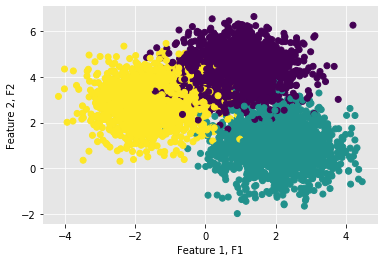

In [44]:
X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=0, cluster_std=0.85)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('IEEE Conference Template/make_blobs.png',bbox_inches='tight', format='png')
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])

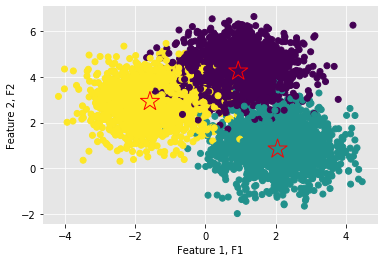

In [45]:
df_ready = kmedoids_des(df)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_blobs_kmedoids.png',bbox_inches='tight', format='png')
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df,0.8)

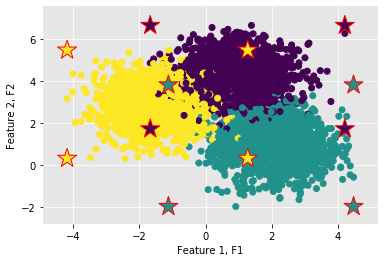

In [46]:
df_ready = corners(df, class_names)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_blobs_corners.png',bbox_inches='tight', format='png')

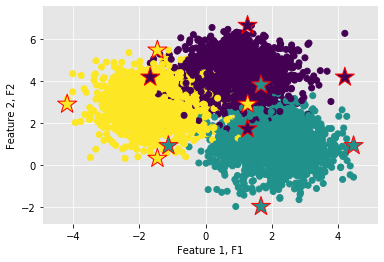

In [47]:
df_ready = middle_points(df, class_names)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_blobs_points.png',bbox_inches='tight', format='png')

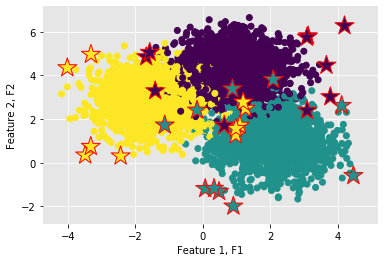

In [48]:
df_ready = check_max_distance(df, class_names, number_of_points, df_features)
df_ready_check_max_distance_make_blobs = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_blobs_max_distance.png',bbox_inches='tight', format='png')

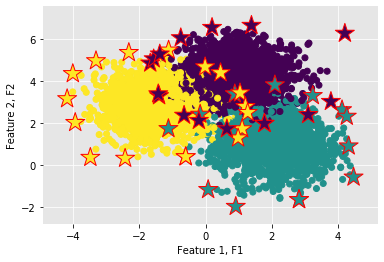

In [49]:
df_ready = alpha_shape(df,class_names, tresh)
df_ready_alpha_make_blobs = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_blobs_alpha.png',bbox_inches='tight', format='png')

In [37]:
df_ready.shape

(46, 2)

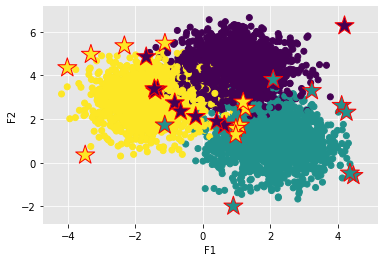

In [38]:
df_ready = compute_circle(df,class_names, tol)
df_ready_compute_circle_make_blobs = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("F1")
plt.ylabel("F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_blobs_circle.png',bbox_inches='tight', format='png')

In [39]:
df_ready.shape

(28, 2)

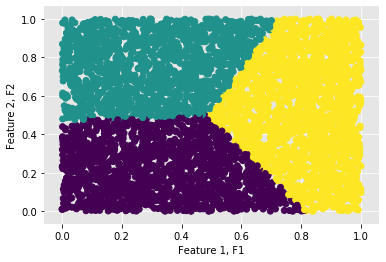

In [71]:
X = np.random.rand(n_samples, 2), None
X = X[0]
df = pd.DataFrame(data=zip(X[:,0],X[:,1]), columns = ['F1','F2'])
features = ['F1', 'F2']

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y = kmeans.labels_
plt.scatter(X[:,0],X[:,1], c = y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('IEEE Conference Template/random_rand.png',bbox_inches='tight', format='png')
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])

In [72]:
df_random_values = df

In [118]:
df_ready

,F1,F2
y,,
1,0.244204,0.707754
0,0.778873,0.665400
2,0.457997,0.202623


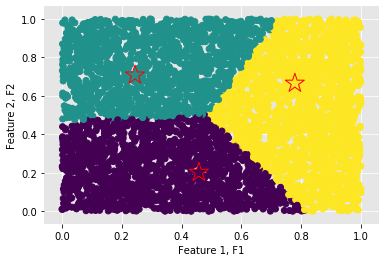

In [122]:
df_ready = kmedoids_des(df)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=[1,2,0],cmap='viridis', marker = '*', edgecolors = 'red', s = 400) #df_ready.index
plt.savefig('IEEE Conference Template/random_rand_kmedoids.png',bbox_inches='tight', format='png')
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df,0.8)

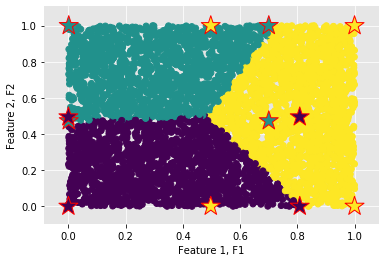

In [123]:
df_ready = corners(df, class_names)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/random_rand_corners.png',bbox_inches='tight', format='png')

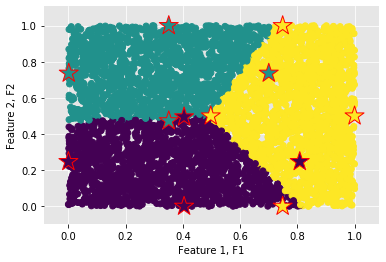

In [124]:
df_ready = middle_points(df, class_names)
df_ready_middle_points_random_values = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/random_rand_points.png',bbox_inches='tight', format='png')

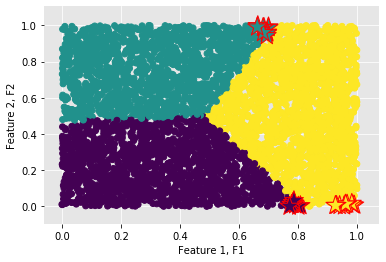

In [125]:
df_ready = check_max_distance(df, class_names, number_of_points, df_features)
df_ready_check_max_distance_random_values = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/random_rand_max_distance.png',bbox_inches='tight', format='png')

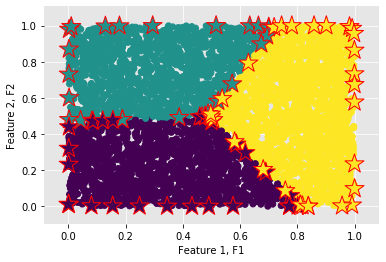

In [126]:
df_ready = alpha_shape(df,class_names, tresh)
df_ready_alpha_shape_random_values = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/random_rand_alpha.png',bbox_inches='tight', format='png')

In [29]:
df_ready.shape

(84, 2)

In [ ]:
df_ready = compute_circle(df,class_names, tol)
df_ready_compute_circle_random_values = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/random_rand_circle.png',bbox_inches='tight', format='png')

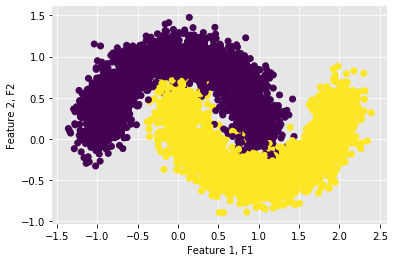

In [140]:
X, y = make_moons(n_samples=n_samples, noise=.15)

plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('IEEE Conference Template/make_moons.png',bbox_inches='tight', format='png')
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])

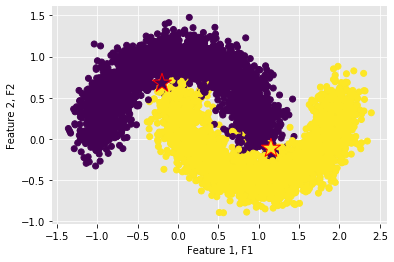

In [142]:
df_ready = kmedoids_des(df)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=[1,0],cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_moons_kmedoids.png',bbox_inches='tight', format='png')
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df,0.8)

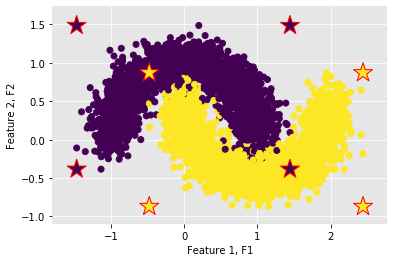

In [129]:
df_ready = corners(df, class_names)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_moons_corners.png',bbox_inches='tight', format='png')

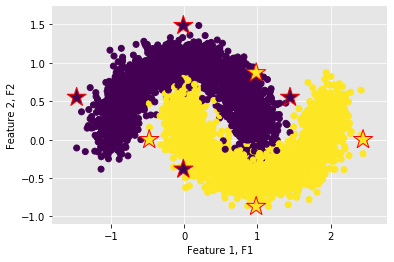

In [130]:
df_ready = middle_points(df, class_names)
df_ready_middle_points_make_moons = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_moons_points.png',bbox_inches='tight', format='png')

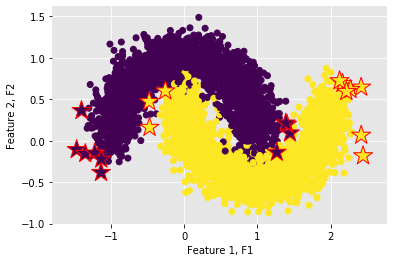

In [131]:
df_ready = check_max_distance(df, class_names, number_of_points, df_features)
df_ready_check_max_distance_make_moons = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index, cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_moons_max_distance.png',bbox_inches='tight', format='png')

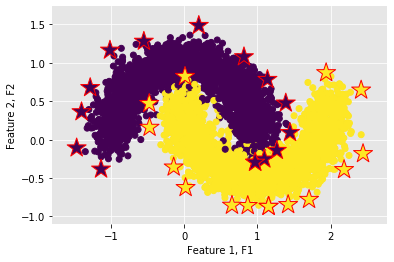

In [132]:
df_ready = alpha_shape(df,class_names, tresh)
df_ready_alpha_make_moons = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_moons_alpha.png',bbox_inches='tight', format='png')

In [46]:
df_ready.shape

(33, 2)

In [ ]:
df_ready = compute_circle(df,class_names, tol)
df_ready_compute_circle_make_moons = df_ready
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("F1")
plt.ylabel("F2")
plt.scatter(df_ready['F1'],df_ready['F2'],c=df_ready.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
plt.savefig('IEEE Conference Template/make_moons_circle.png',bbox_inches='tight', format='png')

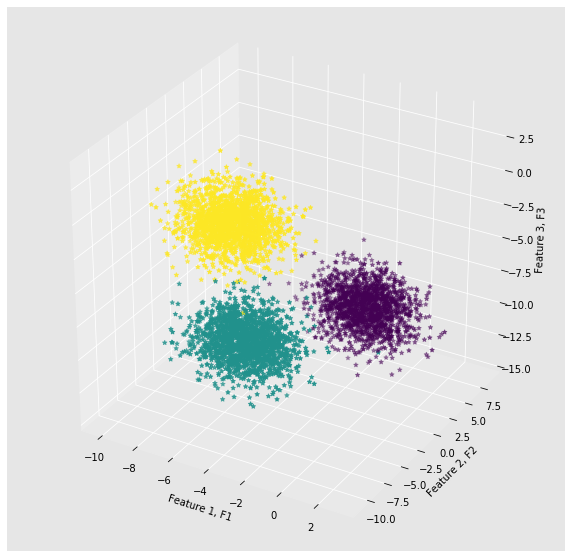

In [133]:
X, y = make_blobs(n_samples=n_samples, centers=3, n_features=3,
                  random_state=1, cluster_std=1.3)
df = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('IEEE Conference Template/make_blobs_3d.png',bbox_inches='tight', format='png')
plt.show()
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df,0.8)

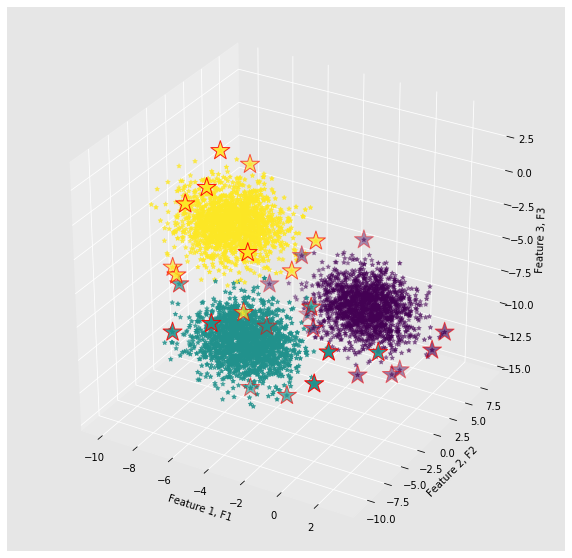

In [134]:
df_ready = tree_query(df, class_names, number_of_points)
df_ready_tree_query_make_blobs = df_ready
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.scatter(df_ready['F1'], df_ready['F2'], df_ready['F3'], c = df_ready.index, cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('IEEE Conference Template/make_blobs_3d_tree_query.png',bbox_inches='tight', format='png')
plt.show()

In [151]:
df_ready.shape

(30, 3)

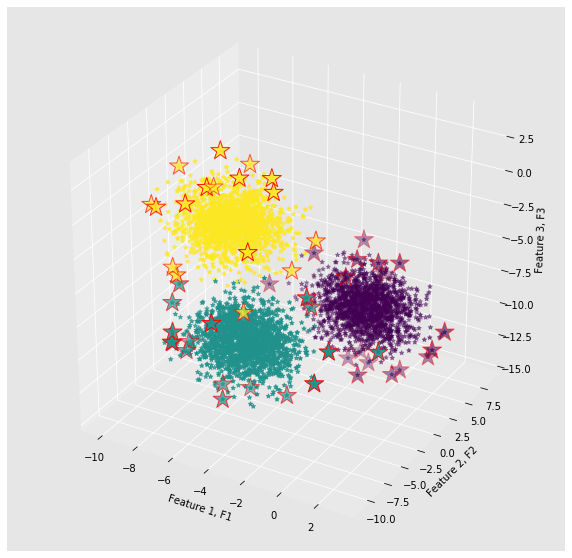

In [135]:
df_ready = outliers(df, class_names)
df_ready_outliers_make_blobs = df_ready
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.scatter(df_ready['F1'], df_ready['F2'], df_ready['F3'], c = df_ready.index, cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('IEEE Conference Template/make_blobs_3d_outliers.png',bbox_inches='tight', format='png')
plt.show()

In [153]:
df_ready.shape

(51, 3)

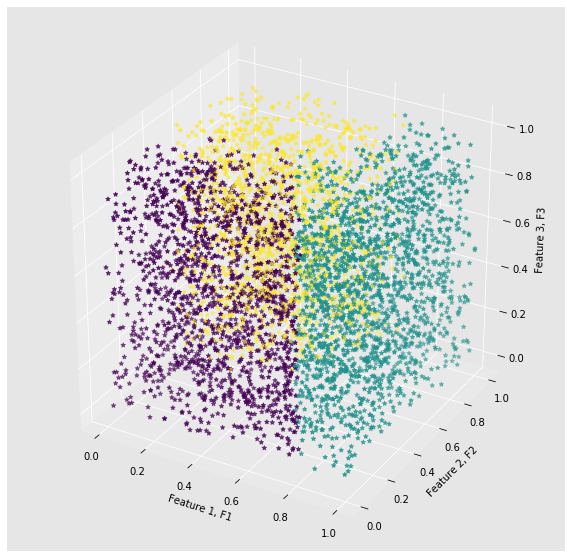

In [136]:
X, y = np.random.rand(n_samples, 3), None

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y = kmeans.labels_

df = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('IEEE Conference Template/random_rand_3d.png',bbox_inches='tight', format='png')
plt.show()

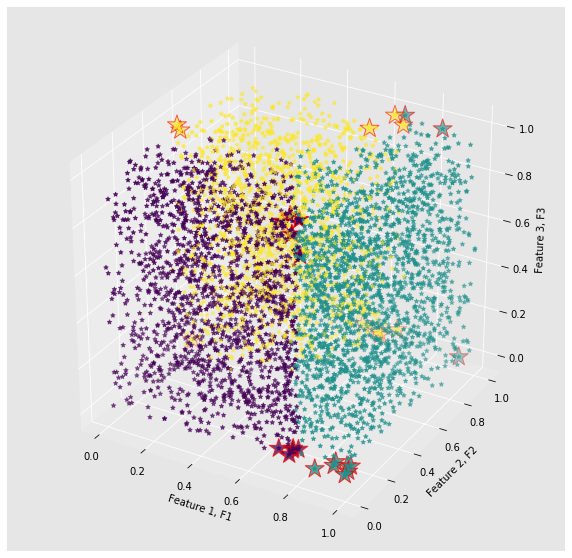

In [137]:
df_ready = tree_query(df, class_names, number_of_points)
df_tree_query_random_values = df_ready
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.scatter(df_ready['F1'], df_ready['F2'], df_ready['F3'], c = df_ready.index, cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('IEEE Conference Template/radnom_rand_3d_tree_query.png',bbox_inches='tight', format='png')
plt.show()

In [167]:
df_ready.shape

(30, 3)

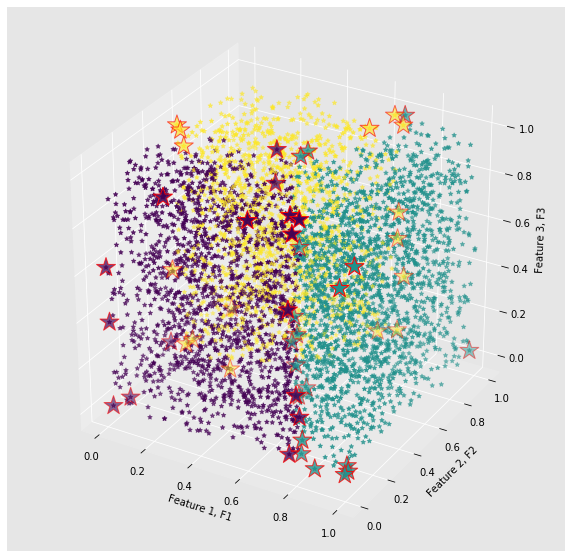

In [138]:
df_ready = outliers(df, class_names)
df_ready_outliers_random_values = df_ready
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.scatter(df_ready['F1'], df_ready['F2'], df_ready['F3'], c = df_ready.index, cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('IEEE Conference Template/radnom_rand_3d_outliers.png',bbox_inches='tight', format='png')
plt.show()

In [169]:
df_ready.shape

(51, 3)

In [52]:
X, y = make_blobs(n_samples=n_samples, centers=10, n_features=15,
                  random_state=1, cluster_std=1.3)
df = pd.DataFrame(data = X)
df.columns = ['F' + str(x + 1) for x in range(len(df.columns))]
df['y'] = y
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df,0.8)
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,y
0,-8.019003,-2.047514,9.426898,0.421563,3.494785,-3.598031,5.378111,6.003549,-9.163310,4.640782,8.785861,3.738587,-4.934744,3.836582,-9.006413,2
1,-5.399925,6.984746,-2.595848,3.053003,4.249251,7.446810,2.885779,4.284342,-1.830046,-4.635400,9.449215,-0.810975,8.575148,3.785652,2.468115,5
2,0.457702,7.755015,-4.775253,-4.015114,-5.873696,-7.815233,4.779492,-5.067168,-5.697696,-1.662940,-7.905566,-0.841530,-8.347215,-0.164258,5.970273,3
3,-3.136876,7.964036,-6.753282,-5.864308,-5.529147,-8.911971,3.240108,-8.063606,-5.631845,-0.823098,-10.174452,1.238417,-9.130876,0.204136,3.143502,3
4,-8.546434,8.294571,0.973507,0.729078,-2.772957,-4.589032,6.771022,1.300706,-8.621840,5.205047,-2.994538,0.357066,9.209107,-2.836045,7.989797,6


In [50]:
df_ready = tree_query(df, class_names, number_of_points)
df_ready_tree_query_make_blobs = df_ready

In [51]:
df_ready_tree_query_make_blobs.shape

(100, 15)

In [53]:
df_ready = outliers(df, class_names)
df_ready_outliers_make_blobs = df_ready

In [54]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,y
0,-8.019003,-2.047514,9.426898,0.421563,3.494785,-3.598031,5.378111,6.003549,-9.163310,4.640782,8.785861,3.738587,-4.934744,3.836582,-9.006413,2
1,-5.399925,6.984746,-2.595848,3.053003,4.249251,7.446810,2.885779,4.284342,-1.830046,-4.635400,9.449215,-0.810975,8.575148,3.785652,2.468115,5
2,0.457702,7.755015,-4.775253,-4.015114,-5.873696,-7.815233,4.779492,-5.067168,-5.697696,-1.662940,-7.905566,-0.841530,-8.347215,-0.164258,5.970273,3
3,-3.136876,7.964036,-6.753282,-5.864308,-5.529147,-8.911971,3.240108,-8.063606,-5.631845,-0.823098,-10.174452,1.238417,-9.130876,0.204136,3.143502,3
4,-8.546434,8.294571,0.973507,0.729078,-2.772957,-4.589032,6.771022,1.300706,-8.621840,5.205047,-2.994538,0.357066,9.209107,-2.836045,7.989797,6


In [56]:
df_ready_outliers_make_blobs.shape

(50, 15)

In [556]:
with open('results.pickle', 'rb') as f:
        results = pickle.load(f)
        
y_pred = results[0]
df = results[1]
w = results[2]
s = results[3]        
        
n = math.ceil(w/s)
cluster_columns = ['y' + str(x) for x in range(0, n)]
clusters = pd.DataFrame(columns = cluster_columns)
clusters['y0'] = [y_pred[0]]*w + list(itertools.chain.from_iterable(itertools.repeat(x, s) for x in y_pred[1:]))
for i in range(1, n):
    clusters.iloc[:,i] = [-1]*s*i+ [y_pred[i]]*(w-s*i) + list(itertools.chain.from_iterable(itertools.repeat(x, s) for x in y_pred[i + 1:])) + [-1]*s*i

clusters['Cluster no'] = clusters.apply(lambda x: statistics.median_low(np.array(list(x))[np.where(np.array(list(x)) >= 0)]), axis = 1)
df_out = df.iloc[:len(clusters) - len(df)]
df_out.insert(loc=len(df.columns), column='Cluster', value=clusters['Cluster no'].tolist())
df_out = df_out.rename(columns={'Cluster': 'y'})
df_out = df_out.reset_index(drop = True)
df_out = df_out.rename(columns={'WWPR': 'F1', 'WGPR': 'F2','WBHP': 'F3','BSWAT1': 'F4','BPR1': 'F5','BSWAT2': 'F6','BPR2': 'F7','BSWAT3': 'F8','BPR3': 'F9'})    
df = df_out

df.head()
  

,F1,F2,F3,F4,F5,F6,F7,F8,F9,y
0,0.000000,0.00,109.37770,0.543000,109.6266,0.543000,109.3841,0.543000,109.3097,0
1,0.003457,28561.05,98.33696,0.543002,109.5999,0.543002,109.3534,0.543002,109.2837,0
2,0.004347,28561.05,97.78270,0.543005,109.5579,0.543006,109.3032,0.543005,109.2408,0
3,0.004723,28561.05,97.54269,0.543009,109.5110,0.543011,109.2473,0.543009,109.1915,0
4,0.004938,28561.05,97.39989,0.543012,109.4647,0.543015,109.1930,0.543013,109.1423,0


In [557]:
df.shape

(11390, 10)

In [505]:
df.groupby('y').mean()

,F1,F2
y,,
0,0.893748,4.270073
1,2.105991,0.876814
2,-1.553536,2.941139


In [506]:
def mean_des(df):
    df_ready = df.groupby('y').mean()
    return df_ready

In [466]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# #############################################################################
# Compute Kmedoids clustering
cobj = KMedoids(n_clusters=3).fit(X)
labels = cobj.labels_

In [471]:
cobj.cluster_centers_

array([[ 1.08687185, -0.96871553],
       [-1.02245321, -1.00055402],
       [ 0.94795722,  1.03758129]])

In [468]:
cobj

KMedoids(init='heuristic', max_iter=300, metric='euclidean', n_clusters=3,
         random_state=None)

In [467]:
labels

array([2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1,
       0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,

In [457]:
X = np.asarray([[1, 2], [1, 4], [1, 0],

                [4, 2], [4, 4], [4, 0]])

In [458]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [460]:
df = pd.DataFrame(X, columns = ['Column_A','Column_B'])

In [461]:
df

,Column_A,Column_B
0,1,2
1,1,4
2,1,0
3,4,2
4,4,4
5,4,0


In [496]:
df

,F1,F2,y
0,-1.023136,2.743989,2
1,1.641332,4.197837,0
2,-1.508187,3.046297,2
3,-1.234406,2.889869,2
4,-2.229930,2.219148,2
...,...,...,...
995,1.984079,0.911159,1
996,-0.935407,2.444967,2
997,0.905192,0.613413,1
998,-2.231130,2.342797,2


In [502]:
def kmedoids_des (df):
    X = df.drop('y', axis = 1).to_numpy()
    kmedoids = KMedoids(n_clusters=len(df['y'].unique()), random_state=0).fit(X)
    df_ready = pd.DataFrame(data = kmedoids.cluster_centers_, columns = df.drop('y', axis = 1).columns)
    df_ready['y'] = df['y'].unique()
    df_ready = df_ready.set_index('y')
    return df_ready

In [492]:
df['y'].unique()

array([2, 0, 1])

In [503]:
df_ready

,F1,F2
y,,
2,-1.505521,2.892064
0,0.834242,4.226869
1,2.102512,0.909100


In [487]:
len(df['y'].unique())

3

In [464]:
kmedoids.labels_

array([0, 0, 0, 1, 1, 1])

In [ ]:
kmedoids.predict([[0,0], [4,4]])

In [463]:
kmedoids.cluster_centers_

array([[1, 2],
       [4, 2]])

In [478]:
len(class_names)

3

In [474]:
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df, 0.8)

In [475]:
class_names

array([2, 0, 1])

In [476]:
df_ready = corners(df, class_names)

In [477]:
df_ready

,F1,F2
y,,
2.0,-3.623133,1.139015
2.0,0.349496,4.767937
2.0,-3.623133,4.767937
2.0,0.349496,1.139015
0.0,-0.885150,2.171487
0.0,2.863627,5.992505
0.0,-0.885150,5.992505
0.0,2.863627,2.171487
1.0,0.111116,-1.086524


# Functions

In [3]:
def prepare_df(df, test_size):
    df_features = df.columns.drop(df.columns[-1])
    num_of_df_features = len(df_features)
    class_names = df[df.columns[-1]].unique()
    X_train, X_test, y_train, y_test = train_test_split(df.drop(df.columns[-1], axis = 1), df[df.columns[-1]], test_size=test_size, random_state=0)
    return X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features

def make_circle(points):
	# Convert to float and randomize order
	shuffled = [(float(x), float(y)) for (x, y) in points]
	random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
	c = None
	for (i, p) in enumerate(shuffled):
		if c is None or not is_in_circle(c, p):
			c = _make_circle_one_point(shuffled[ : i + 1], p)
	return c


# One boundary point known
def _make_circle_one_point(points, p):
	c = (p[0], p[1], 0.0)
	for (i, q) in enumerate(points):
		if not is_in_circle(c, q):
			if c[2] == 0.0:
				c = make_diameter(p, q)
			else:
				c = _make_circle_two_points(points[ : i + 1], p, q)
	return c

def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))


def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))


_MULTIPLICATIVE_EPSILON = 1 + 1e-14

def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON


# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)

# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right

def minmaxdf(df, scale=[-1,1]):
    # Using MinMaxScaler
    min_max_scaler = MinMaxScaler(feature_range=scale)    
    # Stack everything into a single column to scale by the global min / max
    tmp = df.to_numpy().reshape(-1,1)
    scaled = min_max_scaler.fit_transform(tmp).reshape(len(df), df.shape[1])
    return scaled

def parallel_task(dataset, task_wrapper):
    with Pool(cpu_count()) as p:
        ret_list = p.map(task_wrapper, np.array_split(dataset, cpu_count()))
        p.close()
    result = pd.concat(ret_list, sort=True)
    return result

In [4]:
################ Two dimensions

#### Corners

def corners(df, class_names):
    df_vert = pd.DataFrame(data = [], columns = ['F1_min', 'F1_max', 'F2_min', 'F2_max'])
    for cluster in class_names:
        F1_min = df['F1'].min()
        F1_max = df['F1'].max()
        F2_min = df['F2'].min()
        F2_max = df['F2'].max()
        df_vert = df_vert.append({'F1_min': F1_min, 'F1_max': F1_max, 'F2_min': F2_min, 'F2_max': F2_max},  ignore_index = True)


    df_vert = pd.DataFrame(data = [], columns = ['F1_min', 'F1_max', 'F2_min', 'F2_max'])
    df_vert_min = df.groupby('y').min()
    df_vert_min.rename(columns={'F1': 'F1_min', 'F2': 'F2_min'}, inplace=True)
    df_vert_max = df.groupby('y').max()
    df_vert_max.rename(columns={'F1': 'F1_max', 'F2': 'F2_max'}, inplace=True)
    df_vert = pd.concat([df_vert_min, df_vert_max], axis=1)

    df_vert_finall = pd.DataFrame(columns = df.columns)
    comb = [['F1_min','F2_min'],['F1_max','F2_max'],['F1_min','F2_max'],['F1_max','F2_min']]
    for cluster in class_names:
        for combination in comb:
            df_vert_finall = df_vert_finall.append({'F1' : df_vert[df_vert.index == cluster][combination[0]][cluster],'F2' : df_vert[df_vert.index == cluster][combination[1]][cluster], 'y': cluster}, ignore_index = True)
    df_ready = df_vert_finall.set_index('y')
    
    return df_ready


#### Middle points

def middle_points(df, class_names):
    df_vert_finall = corners(df, class_names)
    df_vert_finall.reset_index(inplace=True)
    dataframes_list = []
    df_vertic_middle = pd.DataFrame()
    for cls_idx in class_names:
        df_vertic_middle_temp = pd.DataFrame()
        df_vertic_middle_temp_o = pd.DataFrame()
        df_vertic_middle_temp = df_vertic_middle_temp.append(df_vert_finall[df_vert_finall['y'] == cls_idx])
        df_vertic_middle_temp = df_vertic_middle_temp.sort_values(by = ['F1'], ignore_index = True)
        df_vertic_middle_temp = df_vertic_middle_temp.append(df_vertic_middle_temp[df_vertic_middle_temp['y'] == cls_idx].iloc[0], ignore_index = True)
        for idx in range(4):
            df_vertic_middle_temp_o = df_vertic_middle_temp_o.append(pd.DataFrame(df_vertic_middle_temp.iloc[idx:idx + 2].sum()/2).T, ignore_index = True)
        dataframes_list.append(df_vertic_middle_temp_o)

    df_vertic_middle = pd.concat(dataframes_list)
    df_vertic_middle.reset_index().drop('index', axis = 1)
    df_ready = df_vertic_middle.set_index('y')
    
    return df_ready


#### Circles

def compute_circle(df, class_names, tol):
    df_circles_desc_finall = pd.DataFrame(columns = ['F1', 'F2','y'])
    for cluster in class_names:
        df_circles_desc = pd.DataFrame(columns = ['F1', 'F2','y'])
        df_prep = df[df['y'] == cluster].drop('y', axis = 1).to_numpy().tolist()
        df_prep = [tuple(x) for x in df_prep]
        x_cor,y_cor,r_cor = make_circle(df_prep)
        points_boundary = []
        for p in df_prep:
            boundary = (math.hypot(p[0] - x_cor, p[1] - y_cor) >= r_cor * (1 - tol)) and (math.hypot(p[0] - x_cor, p[1] - y_cor) <= r_cor * (1 + tol))
            if boundary == True:
                points_boundary.append(p)
        
        points_boundary = [list(elem) for elem in points_boundary]
        points_boundary = np.array(points_boundary)
        for points in range(len(points_boundary)):
            df_circles_desc = df_circles_desc.append({'F1': points_boundary[points,0], 'F2': points_boundary[points,1], 'y': cluster}, ignore_index = True)
            df_circles_desc_finall = df_circles_desc_finall.append({'F1': points_boundary[points,0], 'F2': points_boundary[points,1], 'y': cluster}, ignore_index = True)

    df_ready = df_circles_desc_finall.set_index('y')
    
    return df_ready


#### Max distance from center

def check_max_distance(df, class_names, number_of_points, features):
    clf = NearestCentroid()
    clf.fit(X, y)
    df_centroids = pd.DataFrame(clf.centroids_, columns = features)
    temp_list = []
    for row in range(len(df)):
        temp_list.append(math.hypot(df['F1'][row] - df_centroids['F1'][df['y'][row]] , df['F2'][row] - df_centroids['F2'][df['y'][row]]))
    df_max_dist = copy.deepcopy(df)
    df_max_dist['Distance'] = temp_list
    
    list_of_dfs = []
    for cluster in class_names:
        list_of_dfs.append(df_max_dist[df_max_dist['y'] == cluster].sort_values('Distance', ascending=False)[:number_of_points])
    df_max_distance = pd.concat(list_of_dfs)
    
    df_ready = df_max_distance.set_index('y').drop('Distance', axis = 1)
    
    return df_ready

#### Alpha_shape
def alpha_shape(df, class_names, tresh):
    df_alpha = pd.DataFrame(columns = ["F1", "F2", 'y'])
    list_temp = []
    for cluster in class_names:
        df_temp = pd.DataFrame(columns = ["F1", "F2", 'y'])
        points = df[df["y"] == cluster][["F1", "F2"]].to_numpy()
        alpha = tresh
        hull = alphashape.alphashape(points, alpha)
        hull_pts = hull.exterior.coords.xy
        df_temp["F1"] = hull_pts[0]
        df_temp["F2"] = hull_pts[1]
        df_temp["y"] = list([cluster]*len(hull_pts[0]))
        list_temp.append(df_temp)
    df_alpha = pd.concat(list_temp, ignore_index=True)   
    
    df_ready = df_alpha.set_index('y')
    
    return df_ready



In [5]:
################ More dimensions
#### Tree_query

def tree_query(df, class_names, number_of_points):
    rng = np.random.RandomState(0)
    temp_list = []
    X = df.drop('y', axis = 1).to_numpy()
    y = df['y'].to_numpy()
    clf = NearestCentroid()
    clf.fit(X, y)
    df_centroids = pd.DataFrame(clf.centroids_, columns = df.columns[:-1])
    for cluster in class_names:
        X_t = df[df['y'] == cluster].drop('y', axis = 1).values  # 10 points in 3 dimensions
        tree = KDTree(X_t, leaf_size=10)  
        dist, ind = tree.query(df_centroids.iloc[cluster].values.reshape(1,-1), k=len(X_t))      
        temp_df = df[df['y'] == cluster].iloc[ind[0][-number_of_points:],:]
        temp_list.append(temp_df)

    df_ready = pd.concat(temp_list)
    df_ready = df_ready.set_index('y')
    
    return df_ready

def radius(df, class_names, tresh_rad):
    rng = np.random.RandomState(0)
    temp_list = []
    X = df.drop('y', axis = 1).to_numpy()
    y = df['y'].to_numpy()
    clf = NearestCentroid()
    clf.fit(X, y)
    df_centroids = pd.DataFrame(clf.centroids_, columns = df.columns[:-1])
    for cluster in class_names:
        X_t = df[df['y'] == cluster].drop('y', axis = 1).values  # 10 points in 3 dimensions
        tree = KDTree(X_t, leaf_size=10)  
        radius = abs(df.drop('y', axis = 1).mean()).mean()
        ind_f = tree.query_radius(df_centroids.iloc[cluster].values.reshape(1,-1), r=radius*(1-tresh_rad)) 
        ind_s = tree.query_radius(df_centroids.iloc[cluster].values.reshape(1,-1), r=radius*(1+tresh_rad))
        ind = np.setxor1d(ind_s[0], ind_f[0])
        temp_df = df[df['y'] == cluster].iloc[ind,:]
        temp_list.append(temp_df)

    df_ready = pd.concat(temp_list)
    df_ready = df_ready.set_index('y')
    
    return df_ready

def outliers(df, class_names):
    temp_list = []
    for cluster in class_names:
        random_data = df[df['y'] == cluster].drop('y', axis = 1).values
        clf = IsolationForest(behaviour = 'new', max_samples=1000, random_state = 1, contamination= 0.01)
        preds = clf.fit_predict(random_data)
        df_temp = pd.DataFrame(random_data[[i for i, x in enumerate(preds) if x == -1]], columns = df.columns[:-1])
        df_temp['y'] = [cluster] * len(df_temp)
        temp_list.append(df_temp)
        
    df_ready = pd.concat(temp_list)
    df_ready = df_ready.set_index('y')
    
    return df_ready

####Kmedoids

def kmedoids_des (df):
    X = df.drop('y', axis = 1).to_numpy()
    kmedoids = KMedoids(n_clusters=len(df['y'].unique()), random_state=0).fit(X)
    df_ready = pd.DataFrame(data = kmedoids.cluster_centers_, columns = df.drop('y', axis = 1).columns)
    df_ready['y'] = df['y'].unique()
    df_ready = df_ready.set_index('y')
    return df_ready

####means
def mean_des(df):
    df_ready = df.groupby('y').mean()
    return df_ready

# Save HMR

In [6]:
def inparse(condition):
    import re
    fs = re.sub(r'([-+]?[0-9]+\.[0-9]+)(<=|>=|<|>|)(f[0-9]+)(<=|>=|<|>)([-+]?[0-9]+\.[0-9]+)',r'\2',condition)
    ss =re.sub(r'([-+]?[0-9]+\.[0-9]+)(<=|>=|<|>|)(f[0-9]+)(<=|>=|<|>)([-+]?[0-9]+\.[0-9]+)',r'\4',condition)
    res=None
    if fs == '<':
        val = re.sub(r'([-+]?[0-9]+\.[0-9]+)(<=|>=|<|>|)(f[0-9]+)(<=|>=|<|>)([-+]?[0-9]+\.[0-9]+)',r'\1',condition)
        res = re.sub(r'([-+]?[0-9]+\.[0-9]+)(<=|>=|<|>|)(f[0-9]+)(<=|>=|<|>)([-+]?[0-9]+\.[0-9]+)',r'\3 in ['+str(eval(val)+0.001)+r' to \5 ]',condition)
    if ss == '<':
        val = re.sub(r'([-+]?[0-9]+\.[0-9]+)(<=|>=|<|>|)(f[0-9]+)(<=|>=|<|>)([-+]?[0-9]+\.[0-9]+)',r'\5',condition)
        res = re.sub(r'([-+]?[0-9]+\.[0-9]+)(<=|>=|<|>|)(f[0-9]+)(<=|>=|<|>)([-+]?[0-9]+\.[0-9]+)',r'\3 in [\1 to '+str(eval(val)-0.001)+']',condition)
    if res is None:
        return condition
    else:
        return res

def tohmr(series):
    result =[]
    for v in  series.split('AND'):
        v = inparse(v.strip().lower().replace(' ',''))
        result.append(v.replace('<=',' lte ')
                      .replace('>=',' gte ').replace('<',' lt ').replace('>',' gt ').replace('=','eq').lower())
    return '['+','.join(result)+']'

types = """xtype [name: float,
    domain: [-10000 to 10000],
    scale: 0,
    base: numeric
    ].

xtype [name: clustertype,
    domain: [0 to 1000],
    scale: 0,
    base: numeric
    ]."""

atts_cluster = """xattr [name: cluster,
    type: clustertype,
    class: simple,
    comm: out
    ].
"""

atts_placeholder = """
xattr [name: __NAME__,
    type: float,
    class: simple,
    comm: out
    ].
"""

schema_placeholder = """xschm anchor: [__NAME__] ==> [cluster].
"""

def df2hmr(data, filename, confidence='product', numfeats = 2):
    data['hmr_cond'] = data['Rule'].apply(tohmr)  
    data['confidence'] = data['Coverage']*data['Precision']
    #numfeats = max([int(elem[-1]) for elem in data['Rule'][1].split(' ') if "F" in elem])
    atts = ''
    schemacond = []
    for i in range(1,numfeats+1):
        atts+=atts_placeholder.replace('__NAME__','f'+str(i))
        schemacond.append('f'+str(i))
    
    schema = schema_placeholder.replace('__NAME__',','.join(schemacond))

    with open(filename,'w') as f:
        #print(types)
        #print(atts)
        #print(atts_cluster)
        #print(schema)
        f.write(types)
        f.write(atts) 
        f.write(atts_cluster) 
        f.write(schema) 
        for i,r in data.iterrows():
            
            
            #print('xrule anchor/'+str(i)+': '+r['hmr_cond']+ ' ==>  [cluster set '+str(r['Cluster'])+']. #'+str(r['confidence']))
 
            f.write('xrule anchor/'+str(i)+': '+r['hmr_cond']+ ' ==>  [cluster set '+str(r['Cluster'])+']. #'+str(r['confidence'])+'\n')

# Call xai

In [427]:
neighborhood_size = 10
nn = NearestNeighbors(neighborhood_size)

In [428]:
test_size = 0.8

In [429]:
X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df, test_size)

In [430]:
class_names

array([2, 4, 0, 1, 6, 3, 5])

In [431]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [432]:
idx = 1
point = df.drop('y', axis = 1).iloc[idx,:].values.tolist()
point

[-4.765314951073133,
 6.404185741720685,
 -6.643762725248475,
 -3.4635733316736323,
 9.333550407422255,
 0.10919148640725351,
 1.7736713601879153]

In [440]:
neighbors_list = []
df_sample_list = []
for cluster in class_names:
    X_cluster_only = X_train[y_train==cluster]
    nn.fit(X_cluster_only)
    _,ids = nn.kneighbors(np.array(point).reshape(1,-1))
    neighbors_list.append(ids)
    df_sample_list.append(X_cluster_only.iloc[ids.ravel()])
X_train_sample = pd.concat(df_sample_list)
y_train_sample = svc.predict_proba(X_train_sample)[:,1]

with open('lux.numeric.arff', 'w') as file:
    file.write('@relation lux\n\n')
    file.write('@attribute x1 @REAL\n')
    file.write('@attribute x2 @REAL\n')
    file.write('@attribute x3 @REAL\n')
    file.write('@attribute x4 @REAL\n')
    file.write('@attribute class {3,2,1,0}\n\n')
    file.write('@data\n')
    for i in range(0, len(X_train_sample)):
        file.write('{:.2f}'.format(X_train_sample.iloc[i,0])+','+'{:.2f}'.format(X_train_sample.iloc[i,1])+',1['+'{:.2f}'.format(y_train_sample[i])+']\n')
!java -jar udt.jar lux.numeric.arff hmr > explanation.hmr

ParseException: Missing attribute definition, or value in line -7.68,4.93,1[0.04]
	at Data.parseInstances(Data.java:323)
	at Data.readUARFFFromBuffer(Data.java:194)
	at Data.parseUArff(Data.java:230)
	at UId3.main(UId3.java:140)


In [437]:
y_train_sample

array([0.0373151 , 0.04008446, 0.03231119, 0.03428328, 0.03678187,
       0.03688898, 0.03165174, 0.0353706 , 0.02961358, 0.04060647,
       0.04701401, 0.03041788, 0.03536169, 0.02671169, 0.03037703,
       0.02065735, 0.02482902, 0.02385964, 0.02315036, 0.02390282,
       0.02991116, 0.02601734, 0.02191963, 0.03086602, 0.02145405,
       0.02256417, 0.02291223, 0.02258696, 0.02385379, 0.02276924,
       0.81604733, 0.81863985, 0.81116592, 0.81167817, 0.82664112,
       0.8002006 , 0.8358187 , 0.82193493, 0.83023478, 0.8216377 ,
       0.02064665, 0.02076655, 0.0235518 , 0.01842098, 0.02178789,
       0.0176399 , 0.01611819, 0.02469647, 0.01664643, 0.01800375,
       0.03280796, 0.03038319, 0.02726549, 0.02673665, 0.02386885,
       0.02516343, 0.03025859, 0.02350887, 0.02438749, 0.02552921,
       0.0353019 , 0.04031292, 0.04203227, 0.03139259, 0.03670863,
       0.03719283, 0.04253475, 0.02775439, 0.03087265, 0.02972263])

In [434]:
!java -jar udt.jar lux.numeric.arff dot > explanation.dot

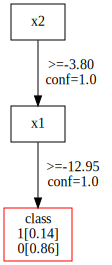

In [435]:
import graphviz
graphviz.Source.from_file('explanation.dot')

In [412]:
df.head()

,F1,F2,y
0,2.458881,0.751855,1
1,0.349443,4.574619,0
2,2.718344,0.789157,1
3,-0.153458,4.154869,0
4,0.242283,3.309775,0


In [413]:
y_train_sample

array([0.75801306, 0.83544219, 0.06678997, 0.06418581, 0.0740219 ,
       0.08599524])

# Shap

In [389]:
shap.initjs()

In [392]:
import warnings
warnings.filterwarnings('ignore')

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svc.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
idx = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][idx,:], X_test.iloc[idx,:], link="logit")

In [32]:
def anchor_exp(df, class_names = [0], number_of_points = 10, tresh = 0.1, tresh_rad = 0.1, tol = 0.05, test_size = 0.8, threshold = 0.9, scores = False, plot = False):
    
    X_train, X_test, y_train, y_test, class_names, num_of_df_features, df_features = prepare_df(df, test_size)
    model = xgb.XGBClassifier()
    le = LabelEncoder()
    le.fit(y_train)
    model.fit(X_train.values,le.transform(y_train))
    predict_fn = lambda x: model.predict_proba(x)
    explainer = AnchorTabular(predict_fn, df_features)
    explainer.fit(X_train.values, disc_perc=[25, 50, 75])
    list_of_rules = []
    
    if len(df_features) == 2:
        datasets_description = [corners, middle_points, kmedoids_des, check_max_distance, alpha_shape]
        datasets_description_additional_inputs = [[df, class_names], [df, class_names], [df], [df, class_names, number_of_points, df_features], [df, class_names, tresh]]
        print('Two dimensions')
    else:
        datasets_description = [tree_query, outliers]
        datasets_description_additional_inputs = [[df, class_names, number_of_points], [df, class_names]]
        print('Multi dimensions')
    for func, additional_input in zip(datasets_description, datasets_description_additional_inputs):
        df_input = func(*additional_input)

        rules = []
        class_names = np.unique(df_input.index)
        rules_out = pd.DataFrame()
        for cluster in class_names:
            anchors = []
            for idx in range(len(df_input.values)):
                indexes = explainer.predictor(df_input.values[idx].reshape(1, -1))[0]
                if class_names[indexes] == cluster:
                    explanation = explainer.explain(df_input.values[idx], threshold=threshold)
                    anchors.append('Anchor: %s' % (' AND '.join(explanation.anchor)))
                    if scores:
                        print("-------------")
                        print('Cluster no: ', cluster)
                        print('Precision: %.2f' % explanation['precision'])
                        print('Coverage: %.2f' % explanation['coverage'])
                        print('Rule: ', anchors)
                    rules_out = rules_out.append({'Rule': (' AND '.join(explanation.anchor)), 'Precision': explanation['precision'], 'Coverage': explanation['coverage'], 'Cluster': cluster}, ignore_index = True) 
        if plot:
            plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
            plt.scatter(df_input['F1'],df_input['F2'],c=df_input.index,cmap='viridis', marker = '*', edgecolors = 'red', s = 400)
            plt.xlabel("F1")
            plt.ylabel("F2")

        rules_out.drop_duplicates(inplace = True, ignore_index = True)

        list_of_rules.append(rules_out)
        rules_out.to_csv('Rules_out_' + func.__name__ + '.csv', sep='\t', index = False)
        rules = pd.read_csv('Rules_out_' + func.__name__ + '.csv', sep='\t')
        df2hmr(rules, 'model_' + func.__name__ + '.hmr', numfeats = num_of_df_features)
        print(f'Number of created rules: {len(rules)}')
        
    return list_of_rules

In [33]:
%%time
list_of_rules = anchor_exp(df, threshold = 0.85)

Two dimensions


Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.


Number of created rules: 9


Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.


Number of created rules: 9
Number of created rules: 3


Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.


Number of created rules: 23


Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.85 precision constraint. Now returning the best non-eligible result.


Number of created rules: 45
CPU times: user 4min 2s, sys: 20 s, total: 4min 22s
Wall time: 15.1 s


# Run HeartDroid

In [34]:
datasets_description = [corners, middle_points, kmedoids_des, check_max_distance, alpha_shape]

In [228]:
datasets_description = [tree_query, outliers]

In [35]:
def heartdroid(df, datasets_description):
    finall_score = pd.DataFrame(columns = [func.__name__ for func in datasets_description])
    if len(df.columns) == 2:
        dim_size = '2d'
    else:
        dim_size = 'multi'
        
    accuracy_list = []
    finall_string = ''
    for func in datasets_description:
        temp_list = []
        df_check = df.loc[:]
        df_check = df_check.reset_index()
        df_check.drop(['index'], axis = 1, inplace = True)
        model = 'model_' + func.__name__ + '.hmr'        
        for steps in range(len(df_check)):
            
            finall_string = ''
            for index in range(len(df.columns) - 1):
                finall_string += f' -A f{index + 1}={df_check.iloc[steps,[index]][0]}'
            
            output_list = !java -jar HMRCommandLine.jar {model} -tabs anchor{finall_string}
            
            
            #output = [elem for elem in output_list if 'Attribute cluster' in elem]
            for o in reversed(output_list):
                if 'Attribute cluster' in o:
                    output = [o]
            if 'null' in output[0]:
                temp_list.append(-1) #undefined cluster
            else:
                temp_list.append(int(float(output[0].split(" = ")[-1])))

        df_check['engine'] = temp_list
        accuracy = sum(df_check['y'] == df_check['engine'])/len(df_check)*100
        #print("Accuracy: ", accuracy)
        accuracy_list.append(accuracy)
                             
    finall_score = finall_score.append(pd.Series(accuracy_list, index = finall_score.columns), ignore_index = True)
    finall_score.index = ['Accuracy']
    finall_score.to_csv('Summary_' + dim_size + '.csv', sep='\t', index = False)
    
    return finall_score

In [36]:
heartdroid_partial = partial(heartdroid, datasets_description = datasets_description)

In [37]:
%%time
result = parallel_task(df, heartdroid_partial)

CPU times: user 2.27 s, sys: 1.21 s, total: 3.48 s
Wall time: 15min 58s


In [38]:
result.mean()

alpha_shape           89.301351
check_max_distance    59.920083
corners               80.999264
kmedoids_des          63.120514
middle_points         77.498927
dtype: float64

In [39]:
def predict_cluster(df, result, datasets_description):
    if len(df.columns) == 2:
        dim_size = '2d'
    else:
        dim_size = 'multi'

    temp_list_cluster = []
    temp_list_rules = []
    temp_list_certeintity = []
    df_check = df.loc[:]

    result_analysis = result.mean()
    model_best = result_analysis.index[np.argmax(result_analysis)]
    print('Best detaset description: ', model_best)
    print('Based on the training data, the best description of the data set was selected with an accuracy of ', round(result_analysis.max(),2), '%')
    model = 'model_' + model_best + '.hmr'        
    for steps in range(len(df_check)):

        finall_string = ''
        for index in range(len(df.columns)):
            finall_string += f' -A f{index + 1}={df_check.iloc[steps,[index]][0]}'

        output_list = !java -jar HMRCommandLine.jar {model} -tabs anchor{finall_string}
        output = ['null']
        #Find cluster
        for o in reversed(output_list):
            if 'Attribute cluster' in o:
                output = [o]
        if 'null' in output[0]:
            temp_list_cluster.append(-1) #undefined cluster
            temp_list_rules.append(-1)
            temp_list_certeintity.append(-1)
        else:
            temp_list_cluster.append(int(float(output[0].split(" = ")[-1])))

            #Find rule
            text = [x for x in output_list if 'fired' in x]
            rule_no = re.findall("[-+]?\d*\.\d+|\d+", text[0])
            rule_no = int(rule_no[0])

            temp_list_rules.append(list_of_rules[[func.__name__ for func in datasets_description].index(model_best)].loc[rule_no][3])

            #Find Certeintity
            stri = 'Finished evaluating rule anchor/'+ str(rule_no) + ' (ID: null)'
            text = [x for x in output_list if stri in x]
            rule_ = re.findall("[-+]?\d*\.\d+|\d+", text[0])
            temp_list_certeintity.append(round(float(rule_[1]),2))

    df_check['Cluster'] = temp_list_cluster
    df_check['Rule'] = temp_list_rules
    df_check['Certainty'] = temp_list_certeintity
    return df_check

### Make blobs

In [27]:
result.mean()

alpha_shape           91.058804
check_max_distance    83.601322
compute_circle        90.880912
corners               80.718336
kmedoids_des          53.279793
middle_points         78.918902
dtype: float64

In [86]:
df_check = predict_cluster(df_ready_check_max_distance_make_blobs, result, datasets_description)

Best detaset description:  check_max_distance
Based on the training data, the best description of the data set was selected with an accuracy of  87.04 %


In [91]:
df_check.head()

,F1,F2,Cluster,Rule,Certainty
y,,,,,
1,-1.123818,1.725204,0,F2 > 1.64 AND -1.14 < F1 <= 1.77,0.54
1,0.911586,-1.985791,1,F2 <= 1.64 AND F1 > -1.14,0.68
1,2.093614,3.811071,0,F2 > 2.99 AND F1 > 0.68,0.48
1,0.076804,-1.180780,1,F2 <= 1.64 AND F1 > -1.14,0.68
1,4.470770,-0.587499,1,F2 <= 1.64 AND F1 > -1.14,0.68


In [90]:
df_check.groupby(['Rule']).mean().drop(['F1', 'F2'], axis = 1)

,Cluster,Certainty
Rule,,
F1 <= -1.14,2,0.25
F1 <= 0.68 AND F2 <= 2.99,2,0.43
F2 <= 1.64 AND F1 > -1.14,1,0.68
F2 <= 2.99 AND F1 > 0.68,1,0.44
F2 > 1.64 AND -1.14 < F1 <= 1.77,0,0.54
F2 > 1.64 AND 0.68 < F1 <= 1.77,0,0.64
F2 > 2.99 AND F1 > 0.68,0,0.48


### Random values

In [40]:
result.mean()

alpha_shape           89.301351
check_max_distance    59.920083
corners               80.999264
kmedoids_des          63.120514
middle_points         77.498927
dtype: float64

In [41]:
df_check = predict_cluster(df_ready_alpha_shape_random_values, result, datasets_description)

Best detaset description:  alpha_shape
Based on the training data, the best description of the data set was selected with an accuracy of  89.3 %


In [42]:
df_check.head()

,F1,F2,Cluster,Rule,Certainty
y,,,,,
0,0.340818,0.000206,0,F2 <= 0.25 AND F1 <= 0.73,0.73
0,0.243584,0.000682,0,F2 <= 0.25 AND F1 <= 0.73,0.73
0,0.106648,0.000310,0,F2 <= 0.25 AND F1 <= 0.73,0.73
0,0.045183,0.009635,0,F2 <= 0.25 AND F1 <= 0.73,0.73
0,0.015993,0.016205,0,F2 <= 0.25 AND F1 <= 0.73,0.73


In [43]:
df_check.groupby(['Rule']).mean().drop(['F1', 'F2'], axis = 1)

,Cluster,Certainty
Rule,,
F1 > 0.49 AND 0.25 < F2 <= 0.77,2,0.43
F1 > 0.49 AND 0.51 < F2 <= 0.77,2,0.44
F1 > 0.73,2,0.25
F2 <= 0.25,2,0.18
F2 <= 0.25 AND F1 <= 0.73,0,0.73
F2 <= 0.51 AND F1 <= 0.73,0,0.65
F2 > 0.51 AND F1 <= 0.73,1,0.68
F2 > 0.77 AND F1 <= 0.73,1,0.74


### Make moons

In [138]:
result.mean()

alpha_shape           74.500924
check_max_distance    60.279989
corners               74.221817
kmedoids_des          49.778689
middle_points         83.480842
dtype: float64

In [139]:
df_check = predict_cluster(df_ready_middle_points_make_moons, result, datasets_description)

Best detaset description:  middle_points
Based on the training data, the best description of the data set was selected with an accuracy of  83.48 %


In [140]:
df_check.head()

,F1,F2,Cluster,Rule,Certainty
y,,,,,
0.0,-1.473802,0.517021,0,F2 > 0.25,0.37
0.0,-0.019551,1.413230,0,F2 > 0.69 AND F1 <= 1.12,0.74
0.0,1.434699,0.517021,0,F2 > 0.25,0.37
0.0,-0.019551,-0.379188,1,F2 <= -0.20 AND F1 > -0.12,0.75
1.0,-0.400451,-0.006233,1,F2 <= 0.25,0.38


In [141]:
df_check.groupby(['Rule']).mean().drop(['F1', 'F2'], axis = 1)

,Cluster,Certainty
Rule,,
F2 <= -0.20 AND F1 > -0.12,1,0.75
F2 <= 0.25,1,0.38
F2 > 0.25,0,0.37
F2 > 0.69 AND F1 <= 1.12,0,0.74


### Make blobs 3d

In [159]:
result.mean()

outliers      94.140290
tree_query    97.079346
dtype: float64

In [160]:
df_check = predict_cluster(df_ready_tree_query_make_blobs, result, datasets_description)

Best detaset description:  tree_query
Based on the training data, the best description of the data set was selected with an accuracy of  97.08 %


In [161]:
df_check.head()

,F1,F2,F3,Cluster,Rule,Certainty
y,,,,,,
1,-6.420654,-10.798902,-6.699457,2,F2 <= -3.00 AND F3 <= -2.70,0.45
1,-1.919388,-2.926183,-6.655903,1,F2 > -3.00 AND F1 > -2.11,0.25
1,-4.571310,-2.448232,-9.365632,0,F2 > -3.00 AND F3 <= -7.80,0.47
1,-8.125419,-5.768470,-6.042033,2,F2 <= -3.00 AND F3 <= -2.70,0.45
1,-4.212599,-10.938120,-5.121925,1,F2 <= -3.00 AND F3 <= -2.70,0.45


In [163]:
df_check.groupby(['Rule']).mean().drop(['F1', 'F2', 'F3'], axis = 1)

,Cluster,Certainty
Rule,,
F2 <= -3.00 AND F3 <= -2.70,1.444444,0.45
F2 <= -3.00 AND F3 <= -9.51,1.000000,0.50
F2 <= 3.60 AND -7.80 < F3 <= -2.70 AND F1 > -3.97,1.000000,0.39
F2 > -3.00 AND F1 > -2.11,1.000000,0.25
F2 > -3.00 AND F3 <= -7.80,0.000000,0.47
F2 > -3.00 AND F3 <= -9.51,0.000000,0.48
F2 > 3.60 AND F1 > -3.97,0.000000,0.48
F2 > 3.60 AND F3 <= -2.70,0.000000,0.22
F3 > -2.70 AND F2 <= 3.60,2.000000,0.75


### Random values 3d

In [174]:
result.mean()

outliers      87.999651
tree_query    82.799081
dtype: float64

In [177]:
df_check = predict_cluster(df_ready_outliers_random_values, result, datasets_description)

Best detaset description:  outliers
Based on the training data, the best description of the data set was selected with an accuracy of  88.0 %


In [178]:
df_check.head()

,F1,F2,F3,Cluster,Rule,Certainty
y,,,,,,
1,0.323639,0.478646,0.985602,1,F3 > 0.72 AND F1 > 0.25,0.67
1,0.351624,0.607813,0.992137,1,F3 > 0.72 AND F1 > 0.25,0.67
1,0.479813,0.086841,0.537016,2,F3 > 0.47 AND F1 > 0.25 AND F2 <= 0.28,0.44
1,0.516088,0.004731,0.983853,1,F3 > 0.72 AND F1 > 0.25,0.67
1,0.431919,0.009963,0.592160,2,F3 > 0.47 AND F1 > 0.25 AND F2 <= 0.28,0.44


In [179]:
df_check.groupby(['Rule']).mean().drop(['F1', 'F2', 'F3'], axis = 1)

,Cluster,Certainty
Rule,,
0.47 < F3 <= 0.72 AND F1 > 0.25 AND F2 > 0.74,2,0.21
0.53 < F1 <= 0.76 AND F3 <= 0.72 AND F2 > 0.28,1,0.17
F1 <= 0.25,2,0.25
F1 <= 0.53 AND F3 > 0.25 AND F2 > 0.28,2,0.41
F1 <= 0.53 AND F3 > 0.47,2,0.40
F3 <= 0.25 AND F1 > 0.25,0,0.75
F3 <= 0.25 AND F2 <= 0.50,0,0.42
F3 <= 0.47 AND F1 > 0.25,0,0.68
F3 > 0.47 AND F1 > 0.25 AND F2 <= 0.28,2,0.44


### Make blobs multi

In [190]:
result.mean()

outliers      92.358779
tree_query    98.240055
dtype: float64

In [200]:
df_check = predict_cluster(df_ready_tree_query_make_blobs, result, datasets_description)

Best detaset description:  tree_query
Based on the training data, the best description of the data set was selected with an accuracy of  98.24 %


In [201]:
df_check.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Cluster,Rule,Certainty
y,,,,,,,,,,,,,,,,,,
2,-5.244312,0.814457,6.409493,0.156201,1.681879,-2.085480,4.503376,8.105808,-9.648408,7.390959,6.664460,4.147927,-4.044405,4.441850,-7.128698,2,F3 > 3.82 AND F9 <= -8.10 AND F10 > 3.02 AND F...,0.24
2,-9.158676,0.125407,6.378191,-0.537836,7.324709,-1.480289,5.015431,7.469501,-11.316548,5.420258,6.734035,2.963422,-4.411660,4.640299,-7.123109,2,F3 > 3.82 AND F9 <= -8.10 AND F10 > 3.02 AND F...,0.24
2,-7.361169,-2.952025,12.923243,2.713296,5.088051,-5.298307,4.378050,7.502871,-8.711989,5.131790,8.984006,7.648430,-3.601388,1.973656,-7.688787,2,F3 > 3.82 AND F12 > 4.56 AND F1 <= -5.89 AND F...,0.44
2,-6.176767,-2.896679,9.452205,0.096881,2.065883,-1.061699,2.842057,8.528263,-11.047066,5.756856,11.230495,4.768627,-1.106722,8.612171,-10.714125,2,F3 > 3.82 AND F12 > 4.56 AND F1 <= -5.89 AND F...,0.44
2,-10.749303,0.001112,8.173666,-1.647047,3.272409,-2.170388,4.610605,5.822969,-6.381284,1.069013,8.745803,4.097813,-5.058817,7.023298,-6.712004,2,F3 > 3.82 AND F1 <= -8.09 AND F12 > 1.03 AND F...,0.23


In [202]:
df_check.groupby(['Rule']).mean().drop(['F1', 'F2', 'F3'], axis = 1)

,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Cluster,Certainty
Rule,,,,,,,,,,,,,,
F1 <= -0.51 AND F6 > 2.08 AND F13 > 6.90,3.941441,3.794583,7.529520,1.424635,4.683106,-4.142428,-4.168172,7.617521,-1.750116,9.891522,1.892237,2.468690,5.000000,0.75
F1 <= -5.89 AND F14 <= -2.97 AND F5 > 5.31,-6.290122,7.976801,1.288242,1.757950,6.626175,-7.611099,-4.746110,0.881810,9.548314,1.466390,-10.596764,5.343139,8.000000,0.46
F12 <= 1.03 AND F9 > 3.05 AND F1 <= -0.51 AND F2 <= 0.84,-2.575233,-7.491321,-0.142395,3.129788,0.844613,9.575170,0.970921,7.293532,-8.580707,-6.741582,8.029471,-1.699684,4.000000,0.66
F14 <= -2.97 AND F12 > 4.56 AND F1 <= -5.89 AND F3 <= -4.66,-5.511104,4.636819,2.004011,4.072136,8.361517,-9.915502,-2.420749,2.975332,8.635082,-2.918665,-9.429313,4.989899,8.000000,0.45
F2 <= 7.53 AND F11 > 3.14 AND F5 <= -6.91 AND F3 > 3.82,-1.136691,-9.991914,0.751706,3.311140,0.652588,9.184464,1.902830,6.919415,-6.316849,-7.783784,5.101205,-2.461078,4.000000,0.75
F3 <= -4.66 AND F14 > 5.40 AND F2 > 0.84,-3.272556,-6.092230,-7.172335,-5.507184,-2.679728,-1.967753,-0.746691,-0.949010,3.315868,-3.580055,7.963164,-8.051146,0.800000,0.48
F3 <= -4.66 AND F15 <= -7.98 AND F5 <= -0.54,-6.160426,-6.979998,-9.547528,-3.496314,1.004894,-2.423779,-0.602261,1.522776,3.184895,-4.202578,3.919577,-12.025976,0.000000,0.25
F3 <= 3.82 AND F10 > 3.02 AND F1 > -0.51 AND F6 > 2.08,-3.795482,-4.643107,5.872213,8.753540,-2.567461,4.509686,7.588784,7.035947,-8.698195,-8.113531,-5.618922,5.793722,1.000000,0.24
F3 <= 3.82 AND F10 > 3.02 AND F8 <= -4.19,-6.166184,-4.944082,0.641945,6.735641,-5.561054,2.014718,5.656958,2.413437,-2.963597,-8.720267,-3.746430,6.071432,1.000000,0.75


In [579]:
df_check['Cluster'].unique()

array([-1,  0,  2])

In [321]:
df

,F1,F2,F3,F4,F5,F6,F7,y
0,-2.397548,5.117282,-10.992791,-2.682691,-9.199166,-9.972039,-6.999328,0
1,-0.264931,2.280935,-9.733503,-3.036937,-7.568771,-9.047167,-6.435564,0
2,-3.419637,-2.662084,0.466322,-2.733500,3.856155,-8.318466,8.320914,1
3,-2.008013,5.243538,-9.146706,-3.563095,-6.554389,-8.604453,-7.843461,0
4,-3.270097,-3.431783,1.181862,-2.244693,1.077966,-6.343136,6.387643,1
...,...,...,...,...,...,...,...,...
1495,-1.100436,4.723146,-11.900389,-4.707319,-7.535022,-7.737125,-5.268747,0
1496,8.819560,-3.745397,4.360662,5.822194,7.839029,-10.126269,-8.444738,3
1497,11.159688,-4.521982,4.825113,5.606742,6.126072,-7.392983,-10.721917,3
1498,0.279535,4.538020,-8.570003,-3.803647,-5.345722,-6.875122,-4.640449,0


In [174]:
df = df_new_podint = pd.DataFrame(columns = ['F1', 'F2'], data = [[2,2]])

In [66]:
output_list

NameError: name 'output_list' is not defined

In [159]:
list_of_rules[[func.__name__ for func in datasets_description].index(model_best)].loc[result][3]

'F2 > 2.77 AND F1 > 0.94'

In [161]:
df = df_new_point

In [166]:
output_list

['HEART: Processing table anchor (ID: null)',
 'HEART: Processing rule anchor/0 (ID: null)',
 'HEART: Finished evaluating rule anchor/0 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/1 (ID: null)',
 'HEART: Finished evaluating rule anchor/1 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/2 (ID: null)',
 'HEART: Finished evaluating rule anchor/2 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/3 (ID: null)',
 'HEART: Finished evaluating rule anchor/3 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/4 (ID: null)',
 'HEART: Finished evaluating rule anchor/4 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/5 (ID: null)',
 'HEART: Finished evaluating rule anchor/5 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/6 (ID: null)',
 'HEART: Finished evaluating rule anchor/6 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/7 (ID: null)',
 'HEART: Finished evaluating rule anchor/7 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/8 (ID: null)',
 'HEART: Finished evaluating rule anchor/8 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/9 (ID: null)',
 'HEART: Finished evaluating rule anchor/9 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/10 (ID: null)',
 'HEART: Finished evaluating rule anchor/10 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/11 (ID: null)',
 'HEART: Finished evaluating rule anchor/11 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/12 (ID: null)',
 'HEART: Finished evaluating rule anchor/12 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/13 (ID: null)',
 'HEART: Finished evaluating rule anchor/13 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/14 (ID: null)',
 'HEART: Finished evaluating rule anchor/14 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/15 (ID: null)',
 'HEART: Finished evaluating rule anchor/15 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/16 (ID: null)',
 'HEART: Finished evaluating rule anchor/16 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/17 (ID: null)',
 'HEART: Finished evaluating rule anchor/17 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/18 (ID: null)',
 'HEART: Finished evaluating rule anchor/18 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/19 (ID: null)',
 'HEART: Finished evaluating rule anchor/19 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/20 (ID: null)',
 'HEART: Finished evaluating rule anchor/20 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/21 (ID: null)',
 'HEART: Finished evaluating rule anchor/21 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/22 (ID: null)',
 'HEART: Finished evaluating rule anchor/22 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/23 (ID: null)',
 'HEART: Finished evaluating rule anchor/23 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/24 (ID: null)',
 'HEART: Finished evaluating rule anchor/24 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/25 (ID: null)',
 'HEART: Finished evaluating rule anchor/25 (ID: null). SATISFIED with (0.0) certainty.',
 'HEART: Processing rule anchor/26 (ID: null)',
 'HEART: Finished evaluating rule anchor/26 (ID: null). SATISFIED with (-0.25) certainty.',
 'HEART: Processing rule anchor/27 (ID: null)',
 'HEART: Finished evaluating rule anchor/27 (ID: null). SATISFIED with (-0.29150578) certainty.',
 'HEART: No rule to fire in table anchor (ID: null).',
 'HEART: Processing table anchor (ID: null) f

In [162]:
if len(df.columns) == 2:
    dim_size = '2d'
else:
    dim_size = 'multi'

accuracy_list = []
finall_string = ''
for func in datasets_description:
    temp_list = []
    df_check = df.loc[:]
    df_check = df_check.reset_index()
    df_check.drop(['index'], axis = 1, inplace = True)
    model = 'model_' + func.__name__ + '.hmr'        
    for steps in range(len(df_check)):

        finall_string = ''
        for index in range(len(df.columns) - 1):
            finall_string += f' -A f{index + 1}={df_check.iloc[steps,[index]][0]}'

        output_list = !java -jar HMRCommandLine.jar {model} -tabs anchor{finall_string}


        #output = [elem for elem in output_list if 'Attribute cluster' in elem]
        for o in reversed(output_list):
            if 'Attribute cluster' in o:
                output = [o]
        if 'null' in output[0]:
            temp_list.append(-1) #undefined cluster
        else:
            temp_list.append(int(float(output[0].split(" = ")[-1])))

    df_check['engine'] = temp_list
    accuracy = sum(df_check['y'] == df_check['engine'])/len(df_check)*100
    #print("Accuracy: ", accuracy)
    accuracy_list.append(round(accuracy,2))

finall_score = finall_score.append(pd.Series(accuracy_list, index = finall_score.columns), ignore_index = True)
finall_score.index = ['Accuracy']
finall_score.to_csv('Summary_' + dim_size + '.csv', sep='\t', index = False)

KeyError: 'y'

In [37]:
output_list

['HEART: Processing table anchor (ID: null)',
 'HEART: Processing rule anchor/0 (ID: null)',
 'HEART: Finished evaluating rule anchor/0 (ID: null). SATISFIED with (-0.17650603) certainty.',
 'HEART: Processing rule anchor/1 (ID: null)',
 'HEART: Finished evaluating rule anchor/1 (ID: null). SATISFIED with (-0.18079096) certainty.',
 'HEART: Processing rule anchor/2 (ID: null)',
 'HEART: Finished evaluating rule anchor/2 (ID: null). SATISFIED with (0.35) certainty.',
 'HEART: Processing rule anchor/3 (ID: null)',
 'HEART: Finished evaluating rule anchor/3 (ID: null). SATISFIED with (0.37032086) certainty.',
 'HEART: Processing rule anchor/4 (ID: null)',
 'HEART: Finished evaluating rule anchor/4 (ID: null). SATISFIED with (0.3704589) certainty.',
 'HEART: Processing rule anchor/5 (ID: null)',
 'HEART: Finished evaluating rule anchor/5 (ID: null). SATISFIED with (0.36335877) certainty.',
 'HEART: Processing rule anchor/6 (ID: null)',
 'HEART: Finished evaluating rule anchor/6 (ID: null). SATISFIED with (0.69331396) certainty.',
 'HEART: Processing rule anchor/7 (ID: null)',
 'HEART: Finished evaluating rule anchor/7 (ID: null). SATISFIED with (0.7325893) certainty.',
 'HEART: Processing rule anchor/8 (ID: null)',
 'HEART: Finished evaluating rule anchor/8 (ID: null). SATISFIED with (-0.25) certainty.',
 'HEART: Conflict set of table anchor (ID: null) is not empty (contains 6 rules).',
 'HEART: Executing decisinos of rule anchor/7 (ID: null)',
 'HEART: Executing decisions cluster set 1.0',
 'HEART: Executing decisions cluster set 1.0 succeeded.',
 'HEART: Executing actions of rule anchor/7 (ID: null)',
 'HEART: Rule anchor/7 (ID: null) fired.',
 'HEART: Processing table anchor (ID: null) finished.',
 'Printing current state (after inference)',
 'Attribute f2 = 0.9661909617267758',
 'Attribute cluster = 1.0',
 'Attribute f1 = 2.3720098862806305']

In [147]:
text = [x for x in output_list if 'fired' in x]
result = re.findall("[-+]?\d*\.\d+|\d+", text[0])
result = int(result[0])

In [160]:
df_new_point = pd.DataFrame(columns = ['a1', 'a2'], data = [[2,5]])

In [148]:
result

7

In [79]:
import re
rules_numbers = pd.DataFrame()
pattern = 'with \('
text = [x for x in output_list if 'Finished evaluating rule anchor' in x]
for x in text:
    result = re.findall("[-+]?\d*\.\d+|\d+", x)
    rules_numbers = rules_numbers.append({'Rule number': result[0], 'Certainty': result[1]}, ignore_index=True)
    rule_number = rules_numbers[rules_numbers['Certainty'] == rules_numbers['Certainty'].max()]['Rule number']

In [81]:
rule_number

7    7
Name: Rule number, dtype: object

In [89]:
rules_out

,Cluster,Coverage,Precision,Rule
0,0.0,0.50,0.894366,F2 > 2.77 AND F1 > -0.81
1,0.0,0.75,0.878049,F2 > 2.77 AND F1 > -0.81
2,0.0,0.25,0.721063,F2 > 4.02
3,0.0,0.25,0.727707,F2 > 4.02
4,0.0,0.25,0.708791,F2 > 4.02
5,0.0,0.25,0.734400,F2 > 4.02
6,0.0,0.50,0.888361,F2 > 2.77 AND F1 > 0.94
7,0.0,0.50,0.901210,F2 > 2.77 AND F1 > 0.94
8,1.0,0.25,0.755474,F1 > 1.75 AND F2 <= 4.02
9,1.0,0.50,0.718023,F2 <= 2.77


In [78]:
a

7    7
Name: Rule number, dtype: object

In [26]:
[x.split('with') for x in output_list if 'with' in x]

[['HEART: Finished evaluating rule anchor/0 (ID: null). SATISFIED ',
  ' (-0.17650603) certainty.'],
 ['HEART: Finished evaluating rule anchor/1 (ID: null). SATISFIED ',
  ' (-0.18079096) certainty.'],
 ['HEART: Finished evaluating rule anchor/2 (ID: null). SATISFIED ',
  ' (0.35) certainty.'],
 ['HEART: Finished evaluating rule anchor/3 (ID: null). SATISFIED ',
  ' (0.37032086) certainty.'],
 ['HEART: Finished evaluating rule anchor/4 (ID: null). SATISFIED ',
  ' (0.3704589) certainty.'],
 ['HEART: Finished evaluating rule anchor/5 (ID: null). SATISFIED ',
  ' (0.36335877) certainty.'],
 ['HEART: Finished evaluating rule anchor/6 (ID: null). SATISFIED ',
  ' (0.69331396) certainty.'],
 ['HEART: Finished evaluating rule anchor/7 (ID: null). SATISFIED ',
  ' (0.7325893) certainty.'],
 ['HEART: Finished evaluating rule anchor/8 (ID: null). SATISFIED ',
  ' (-0.25) certainty.']]

In [119]:
heartdroid_partial = partial(heartdroid, datasets_description = datasets_description)

In [120]:
%%time
result = parallel_task(df_new_point, heartdroid_partial)

KeyError: 'y'

In [170]:
result.mean()

alpha_shape           83.630000
check_max_distance    66.468333
compute_circle        67.619583
corners               74.047083
middle_points         74.047083
dtype: float64

In [171]:
df

,F1,F2,y
0,1.065109,4.585180,0
1,-1.811063,3.424940,2
2,-1.882166,2.181566,2
3,1.424362,3.171918,0
4,-0.379126,4.435932,0
...,...,...,...
495,2.478852,1.524553,1
496,2.629493,1.849628,1
497,2.595252,1.618271,1
498,0.226743,5.041904,0


In [51]:
df['new'] = df.apply(lambda row: (row['F1'] + row['F2'])**2, axis = 1)

In [52]:
df

,F1,F2,y,new
0,1.065109,4.585180,0,31.925759
1,-1.811063,3.424940,2,2.604599
2,-1.882166,2.181566,2,0.089640
3,1.424362,3.171918,0,21.125792
4,-0.379126,4.435932,0,16.457679
...,...,...,...,...
495,2.478852,1.524553,1,16.027247
496,2.629493,1.849628,1,20.062520
497,2.595252,1.618271,1,17.753772
498,0.226743,5.041904,0,27.758639


In [27]:
%%time
heartdroid(df, datasets_description)

Accuracy:  74.0
Accuracy:  74.0
Accuracy:  67.60000000000001
Accuracy:  83.6
Accuracy:  66.4
CPU times: user 12.2 s, sys: 46.9 s, total: 59.1 s
Wall time: 14min 27s


,corners,middle_points,compute_circle,check_max_distance,alpha_shape
Accuracy,74.0,74.0,67.6,83.6,66.4


In [113]:
%%time # 500
heartdroid(df, datasets_description)

Accuracy:  92.33333333333333
Accuracy:  79.0
Accuracy:  73.0
Wall time: 7min 46s


,tree_query,radius_3d,outliers_3d
Accuracy,92.33,79.0,73.0


In [15]:
%%time # 5 000, 8 features
heartdroid(df, datasets_description)

Accuracy:  92.08
Wall time: 1h 23min 38s


,tree_query
Accuracy,92.08


In [24]:
%%time # 50 000, 8 features
heartdroid(df, datasets_description)

Accuracy:  94.734
Wall time: 11h 6min 27s


,tree_query
Accuracy,94.73


In [56]:
df

,F1,F2,y
0,1.065109,4.585180,0
1,-1.811063,3.424940,2
2,-1.882166,2.181566,2
3,1.424362,3.171918,0
4,-0.379126,4.435932,0
...,...,...,...
495,2.478852,1.524553,1
496,2.629493,1.849628,1
497,2.595252,1.618271,1
498,0.226743,5.041904,0


In [57]:
df_check

,F1,F2,y,engine
0,1.065109,4.585180,0,0
1,-1.811063,3.424940,2,0
2,-1.882166,2.181566,2,1
3,1.424362,3.171918,0,0
4,-0.379126,4.435932,0,0
...,...,...,...,...
495,2.478852,1.524553,1,1
496,2.629493,1.849628,1,1
497,2.595252,1.618271,1,1
498,0.226743,5.041904,0,0


In [140]:
finall_score = pd.DataFrame(columns = [func.__name__ for func in datasets_description])
if len(df.columns) == 2:
    dim_size = '2d'
else:
    dim_size = 'multi'

accuracy_list = []
finall_string = ''
for func in datasets_description:
    temp_list = []
    df_check = df.loc[:10]
    df_check = df_check.reset_index()
    df_check.drop(['index'], axis = 1, inplace = True)
    model = 'model_' + func.__name__ + '.hmr'        
    for steps in range(len(df_check)):

        finall_string = ''
        for index in range(len(df.columns) - 1):
            finall_string += f' -A f{index + 1}={df_check.iloc[steps,[index]][0]}'

        output_list = !java -jar HMRCommandLine.jar {model} -tabs anchor{finall_string}


        #output = [elem for elem in output_list if 'Attribute cluster' in elem]
        for o in reversed(output_list):
            if 'Attribute cluster' in o:
                output = [o]
            
        if 'null' in output[0]:
            temp_list.append(-1) #undefined cluster
        else:
            temp_list.append(int(float(output[0].split(" = ")[-1])))

    df_check['engine'] = temp_list
    accuracy = sum(df_check['y'] == df_check['engine'])/len(df_check)*100
    print("Accuracy: ", accuracy)
    accuracy_list.append(round(accuracy,2))

finall_score = finall_score.append(pd.Series(accuracy_list, index = finall_score.columns), ignore_index = True)
finall_score.index = ['Accuracy']

Accuracy:  90.9090909090909
Accuracy:  90.9090909090909
Accuracy:  63.63636363636363


In [141]:
output_list

['HEART: Processing table anchor (ID: null)',
 'HEART: Processing rule anchor/0 (ID: null)',
 'HEART: Finished evaluating rule anchor/0 (ID: null). SATISFIED with (-0.18029594) certainty.',
 'HEART: Processing rule anchor/1 (ID: null)',
 'HEART: Finished evaluating rule anchor/1 (ID: null). SATISFIED with (-0.19862385) certainty.',
 'HEART: Processing rule anchor/2 (ID: null)',
 'HEART: Finished evaluating rule anchor/2 (ID: null). SATISFIED with (-0.25) certainty.',
 'HEART: Processing rule anchor/3 (ID: null)',
 'HEART: Finished evaluating rule anchor/3 (ID: null). SATISFIED with (-0.25) certainty.',
 'HEART: Processing rule anchor/4 (ID: null)',
 'HEART: Finished evaluating rule anchor/4 (ID: null). SATISFIED with (-0.18366164) certainty.',
 'HEART: Processing rule anchor/5 (ID: null)',
 'HEART: Finished evaluating rule anchor/5 (ID: null). SATISFIED with (0.44309926) certainty.',
 'HEART: Processing rule anchor/6 (ID: null)',
 'HEART: Finished evaluating rule anchor/6 (ID: null). SATISFIED with (-0.4254317) certainty.',
 'HEART: Processing rule anchor/7 (ID: null)',
 'HEART: Finished evaluating rule anchor/7 (ID: null). SATISFIED with (-0.40836012) certainty.',
 'HEART: Conflict set of table anchor (ID: null) is not empty (contains 1 rules).',
 'HEART: Executing decisinos of rule anchor/5 (ID: null)',
 'HEART: Executing decisions cluster set 5.0',
 'HEART: Executing decisions cluster set 5.0 succeeded.',
 'HEART: Executing actions of rule anchor/5 (ID: null)',
 'HEART: Rule anchor/5 (ID: null) fired.',
 'HEART: Processing table anchor (ID: null) finished.',
 'Printing current state (after inference)',
 'Attribute f1 = 9.873747664864299',
 'Attribute f5 = -6.424285265403062',
 'Attribute f8 = -5.423478735223488',
 'Attribute f4 = 6.314374212504984',
 'Attribute f3 = -4.391917065309346',
 'Attribute f7 = 8.275548612137271',
 'Attribute f2 = 3.5941180220389732',
 'Attribute f6 = -1.6457118095299754',
 'Attribute cluster = 5.0']

In [142]:
df_check

,F1,F2,F3,F4,F5,F6,F7,F8,y,engine
0,8.763434,-1.201172,3.982531,-5.342205,3.816329,7.395296,-11.348800,6.101941,4,-1
1,-1.294695,4.311443,-8.489272,-3.473008,-4.588826,-6.708854,-5.418031,-5.204455,0,-1
2,-1.657681,1.094977,-5.939032,-5.464727,6.443228,8.984879,-2.671236,3.479845,2,2
3,-5.056381,-1.185349,-6.955998,-5.839884,6.660348,9.464002,-1.732923,5.894971,2,2
4,-2.353789,2.687543,-2.747120,4.184338,-4.801688,7.380723,-7.650040,4.121919,1,-1
5,-1.639036,3.034009,-4.997362,-5.729449,2.767215,9.864899,-5.435367,3.195540,2,2
6,9.009307,0.416608,5.474416,-4.667258,3.362050,5.011955,-9.508473,6.393238,4,-1
7,-0.491985,2.407845,-10.014186,-6.838109,7.269246,12.516830,-0.936056,5.070878,2,2
8,8.843275,5.060133,-1.674457,6.406124,-7.164419,-2.389175,7.455772,-4.540423,5,5
9,-0.754294,1.286370,-1.033215,5.167311,-5.775686,8.248753,-9.861181,1.660837,1,1


In [30]:
temp_list = []
df_check = df.loc[:]
df_check = df_check.reset_index()
df_check.drop(['index'], axis = 1, inplace = True)
#model = 'model_' + func.__name__ + '.hmr'
for steps in range(len(df_check)):
    output_list = !java -jar HMRCommandLine.jar model_corners.hmr -tabs anchor -A f1={df_check.iloc[steps,[0]][0]} -A f2={df_check.iloc[steps,[1]][0]}
    output = [elem for elem in output_list if 'Attribute cluster' in elem]  
    temp_list.append(int(float(output[0].split(" = ")[-1])))
df_check['engine'] = temp_list
accuracy = sum(df_check['y'] == df_check['engine'])/len(df_check)*100
print("Accuracy: ", accuracy)

ValueError: could not convert string to float: 'null'

In [178]:
df_check

,F1,F2,F3,F4,F5,F6,F7,y
0,-3.221318,-2.002615,-1.797504,-0.161910,4.640208,-4.120192,7.672585,1
1,-4.530709,6.033879,-7.713450,-0.232357,8.804287,-1.955619,-6.465173,6
2,-1.190789,-2.426152,1.343931,-1.566422,5.641490,-2.533827,7.090558,1
3,-10.185160,3.158683,-3.030918,1.439719,-6.160348,-6.001670,8.075059,2
4,-8.535785,10.042962,-9.259536,-1.965218,8.880904,0.494976,5.221617,4
...,...,...,...,...,...,...,...,...
195,-5.938300,4.041594,-8.728324,0.306412,7.015627,-4.515640,-1.968938,6
196,-4.973720,5.997367,-8.364557,0.391660,6.230045,-3.095812,-5.897305,6
197,-3.784277,4.446469,-7.950572,-1.079224,9.442607,-6.215398,-2.980941,6
198,-7.643435,1.613093,-3.161928,-0.221004,-6.002331,-6.827003,7.203109,2


In [31]:
temp_list = []
df_check = df.loc[:]
df_check = df_check.reset_index()
df_check.drop(['index'], axis = 1, inplace = True)
for steps in range(len(df_check)):
    finall_string = ''
    for index in range(len(df.columns) - 1):
        finall_string += f' -A f{index + 1}={df_check.iloc[steps,[index]][0]}'
    
    #output_list = !java -jar HMRCommandLine.jar model_corners.hmr -tabs anchor -A f1={df_check.iloc[steps,[0]][0]} -A f2={df_check.iloc[steps,[1]][0]}
    output_list = !java -jar HMRCommandLine.jar model_corners.hmr -tabs anchor {finall_string}
    output = [elem for elem in output_list if 'Attribute cluster' in elem]  
    temp_list.append(int(float(output[0].split(" = ")[-1])))

df_check['engine'] = temp_list
print("Accuracy: ", sum(df_check['y'] == df_check['engine'])/len(df_check)*100)
df_check

ValueError: could not convert string to float: 'null'

In [29]:
output_list 

['java.lang.Exception: Table: {finall_string} is not registered in model',
 '\tat pl.edu.uj.javaframe.HMRCommandLine.main(HMRCommandLine.java:112)']